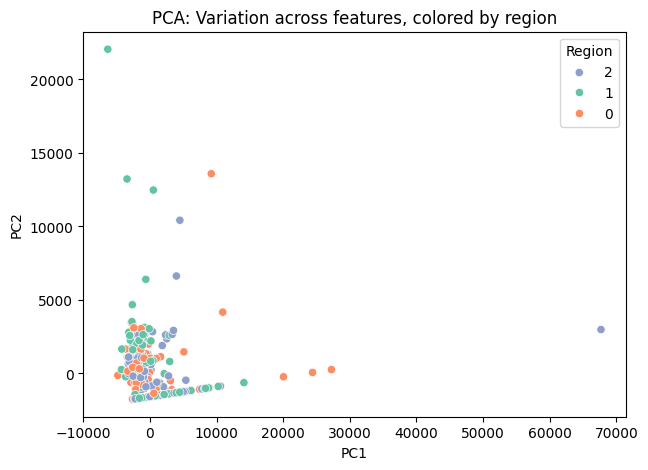

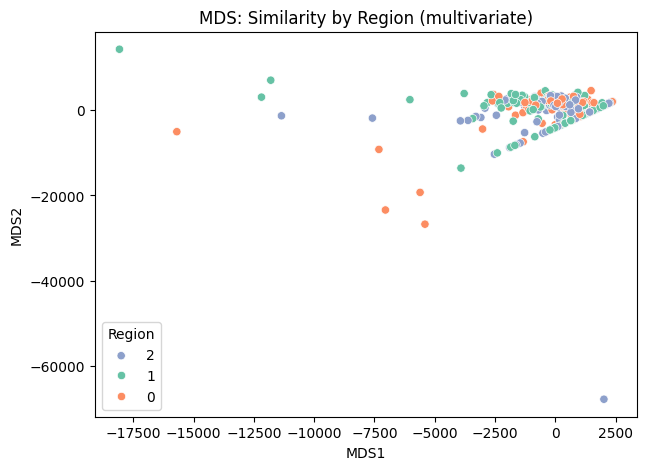

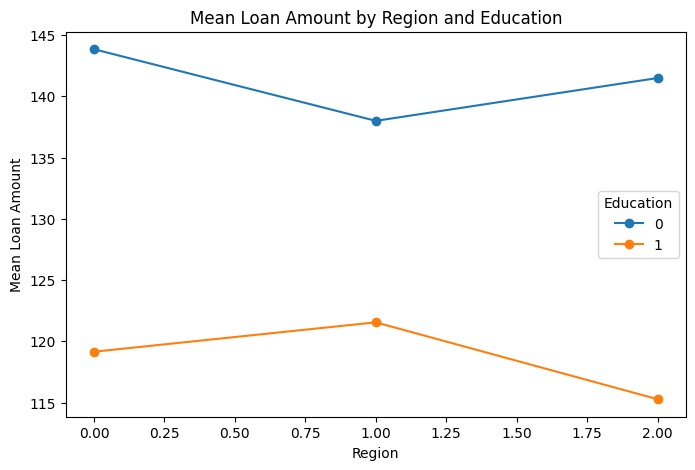

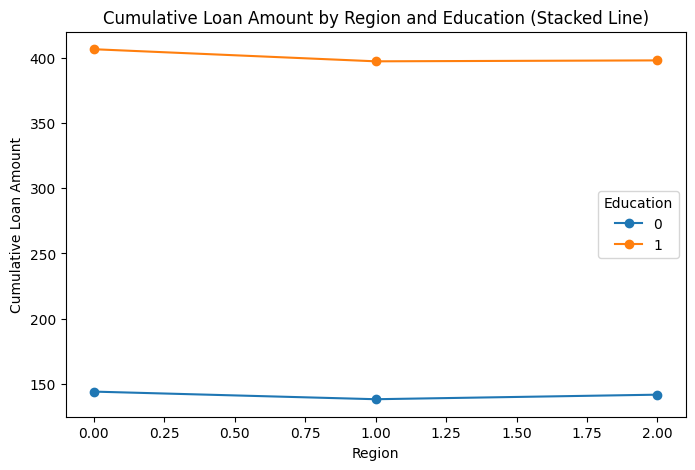

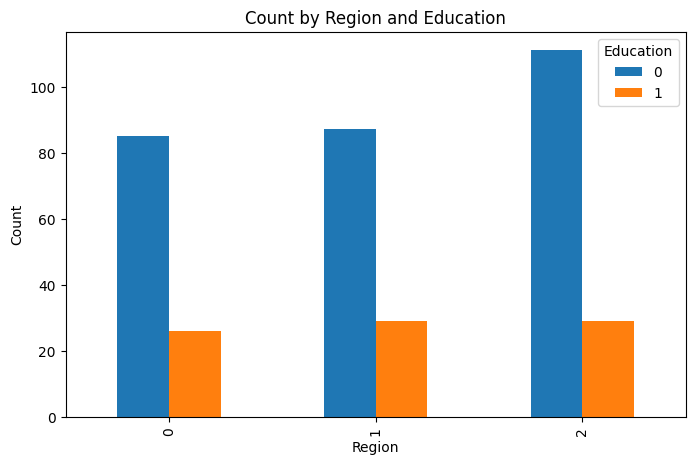

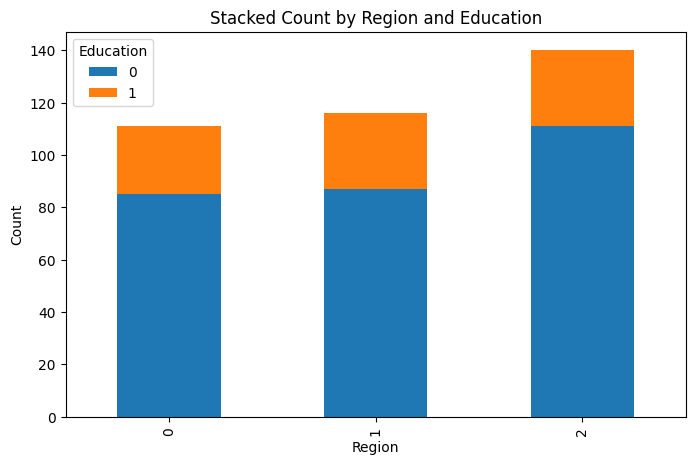

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Clean Data
df = pd.read_csv('loan_sanction_test.csv')

# Fill missing values correctly for mode with iloc
for col in df.columns:
    if df[col].dtype == 'object':
        # Use iloc[0] to get the actual mode value
        df[col] = df[col].fillna(df[col].mode().iloc[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Convert 'Dependents' from '3+' to 3 and then to int
if 'Dependents' in df.columns:
    df['Dependents'] = df['Dependents'].replace('3+', 3)
    # Convert to numeric, coercing errors, then to int
    df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce').astype(int)


# Encode categorical columns except Loan_ID
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' and col != 'Loan_ID':
        df[col] = le.fit_transform(df[col])

# Define region/color for plotting
region_col = 'Property_Area'
region_names = {i: name for i, name in enumerate(df[region_col].unique())}
region_palette = sns.color_palette('Set2', len(region_names))

# Prepare features for PCA and MDS (drop Loan_ID)
X = df.drop(['Loan_ID'], axis=1)
y_region = df[region_col]

# PCA: visualize multivariate variation colored by region
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_region, palette=region_palette)
plt.title('PCA: Variation across features, colored by region')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Region', labels=[region_names[i] for i in range(len(region_names))])
plt.show()

# MDS: visualize similarity colored by region
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_mds[:,0], y=X_mds[:,1], hue=y_region, palette=region_palette)
plt.title('MDS: Similarity by Region (multivariate)')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.legend(title='Region', labels=[region_names[i] for i in range(len(region_names))])
plt.show()

# Line graph: Mean LoanAmount by region and education
line_df = df.groupby([region_col, 'Education'])['LoanAmount'].mean().unstack()
line_df.plot(kind='line', marker='o', figsize=(8,5))
plt.title('Mean Loan Amount by Region and Education')
plt.ylabel('Mean Loan Amount')
plt.xlabel('Region')
plt.show()

# Stacked line graph: Cumulative LoanAmount by region and education
line_cumsum = line_df.cumsum(axis=1)
line_cumsum.plot(kind='line', marker='o', stacked=True, figsize=(8,5))
plt.title('Cumulative Loan Amount by Region and Education (Stacked Line)')
plt.ylabel('Cumulative Loan Amount')
plt.xlabel('Region')
plt.show()

# Grouped bar chart: Count by region and education (categorical multivariate)
grouped_bar = df.groupby([region_col, 'Education']).size().unstack()
grouped_bar.plot(kind='bar', figsize=(8,5))
plt.title('Count by Region and Education')
plt.ylabel('Count')
plt.xlabel('Region')
plt.show()

# Stacked bar chart: Stacked counts by region and education
grouped_bar.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Stacked Count by Region and Education')
plt.ylabel('Count')
plt.xlabel('Region')
plt.show()

/tmp/ipython-input-3869039201.py:22: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)


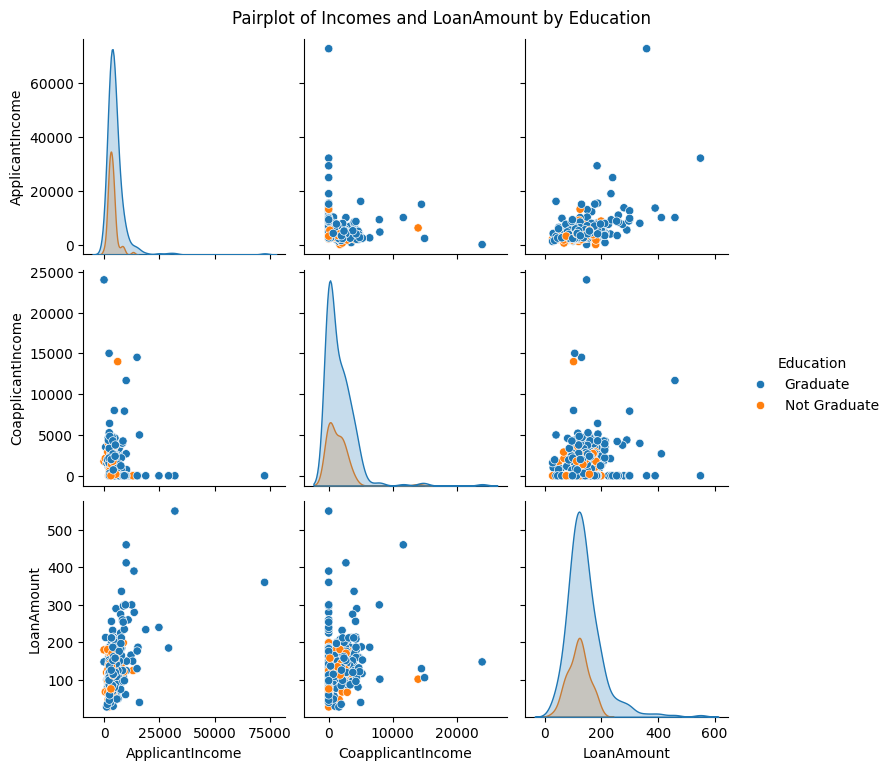

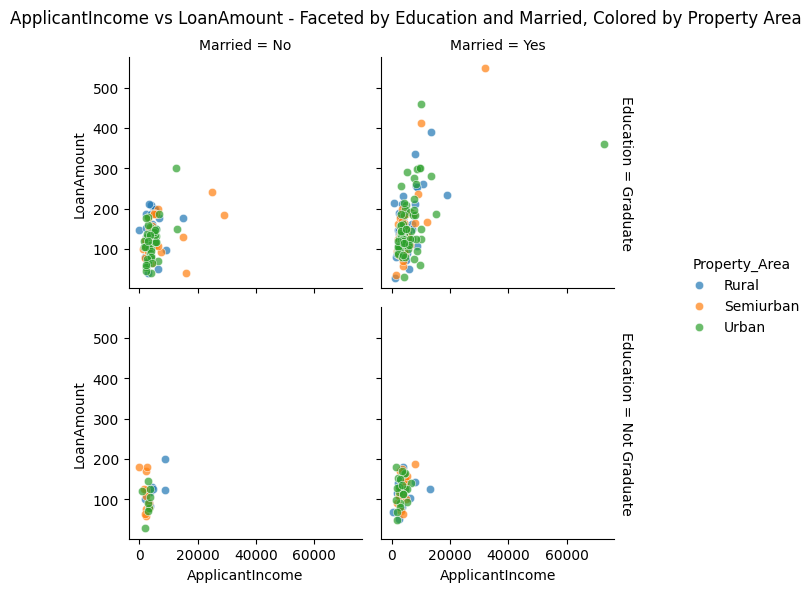

/tmp/ipython-input-3869039201.py:50: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



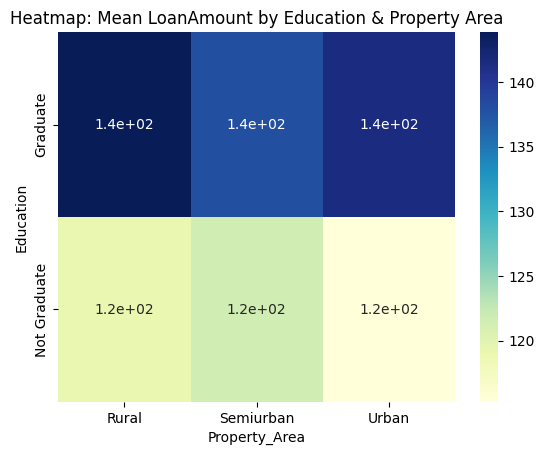

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Load and Clean Data
df = pd.read_csv('loan_sanction_test.csv')
# Fill missing values: mode for categorical, median for continuous
for col in df.columns:
    if df[col].dtype == 'O':
        # Fill missing values in 'Dependents' with mode before replacement
        if col == 'Dependents':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())
for col in df.select_dtypes('object').columns:
    df[col] = df[col].astype('category')
if 'Dependents' in df.columns:
    # Replace '3+' with 3 and then convert to int
    df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)
# Categorical and continuous columns for reference
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
cont_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']
# 1. Multivariate Pairplot (seaborn)
sns.pairplot(df, vars=['ApplicantIncome','CoapplicantIncome','LoanAmount'], hue='Education', diag_kind='kde')
plt.suptitle('Pairplot of Incomes and LoanAmount by Education', y=1.02)
plt.show()
# 2. Faceted Scatterplot: colored by property area, faceted by education and married
g = sns.FacetGrid(df, row='Education', col='Married', hue='Property_Area', margin_titles=True)
g.map_dataframe(sns.scatterplot, x='ApplicantIncome', y='LoanAmount', alpha=0.7)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('ApplicantIncome vs LoanAmount - Faceted by Education and Married, Colored by Property Area')
plt.show()
# 3. Interactive Parallel Categories (Plotly): See flows in categoricals
fig = px.parallel_categories(df,
                            dimensions=['Education', 'Property_Area', 'Married', 'Self_Employed'],
                            color='LoanAmount', color_continuous_scale=px.colors.sequential.Inferno)
fig.update_layout(title='Parallel Categories: Loan Features & LoanAmount')
fig.show()
# 4. Interactive 3D Scatter (Plotly): 3 continuous + 2 categoricals
fig = px.scatter_3d(df,
                    x='ApplicantIncome', y='LoanAmount', z='CoapplicantIncome',
                    color='Property_Area', symbol='Education',
                    title='3D Scatter: Income, Loan, Coapplicant by Area/Education')
fig.show()
# 5. Heatmap: Mean LoanAmount by Education and Property_Area
pivot = pd.pivot_table(df, values='LoanAmount', index='Education', columns='Property_Area', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Heatmap: Mean LoanAmount by Education & Property Area')
plt.show()

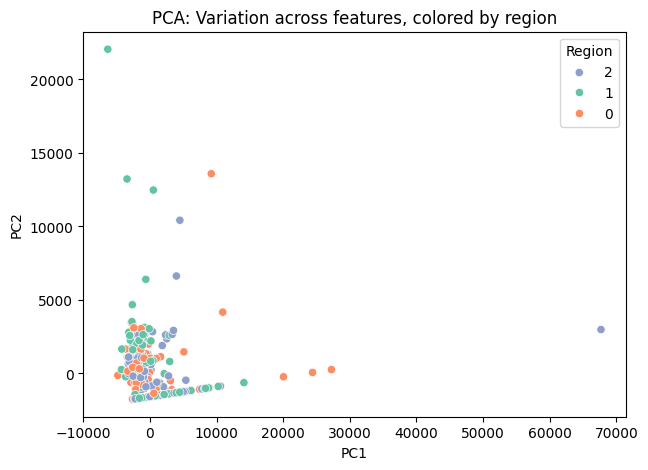

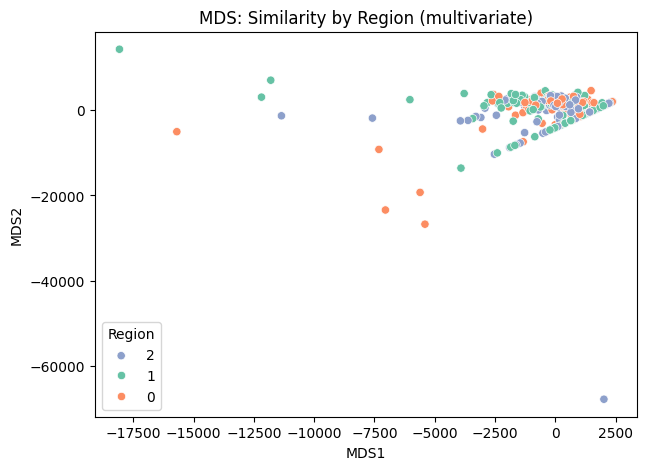

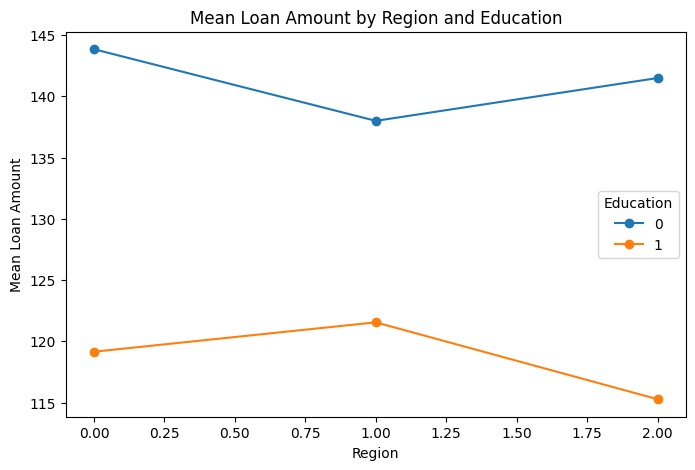

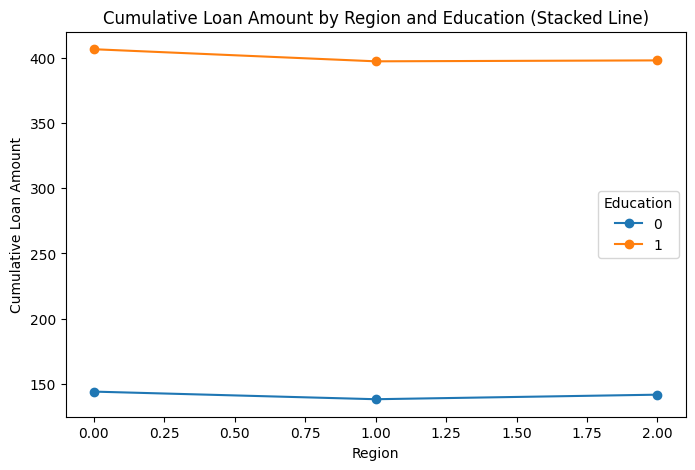

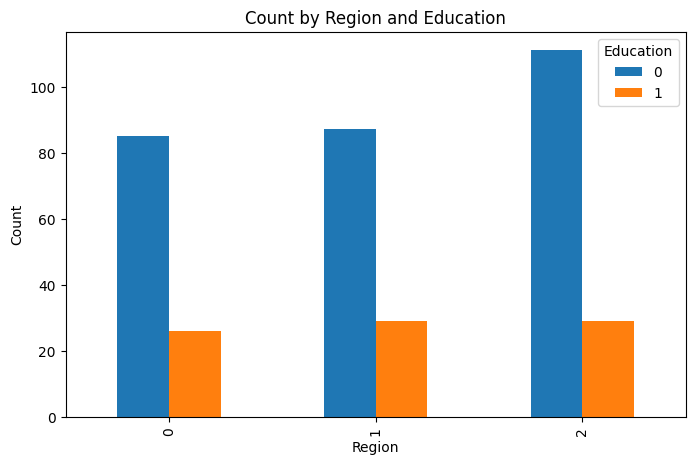

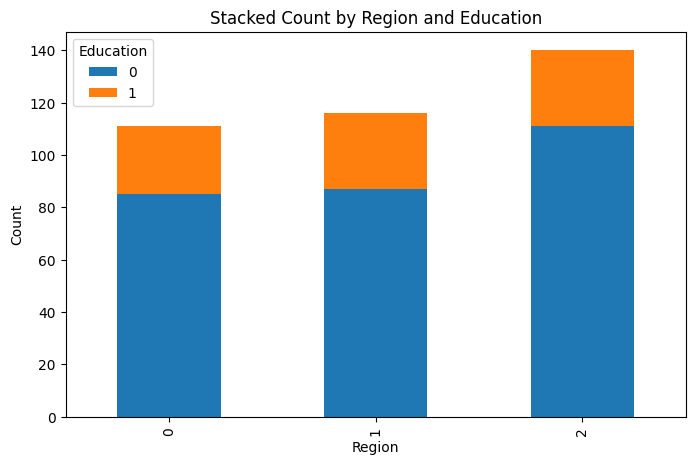

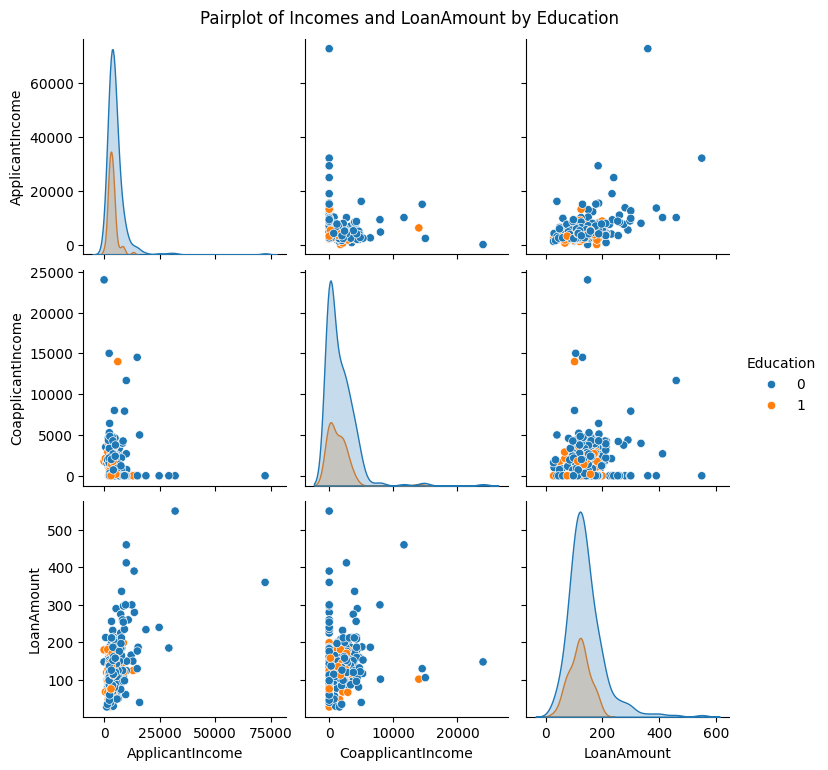

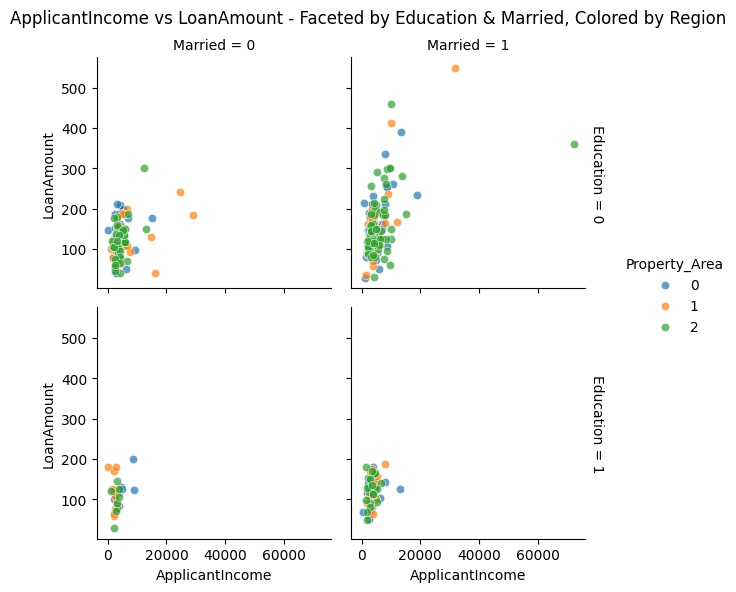

/tmp/ipython-input-3050013610.py:124: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



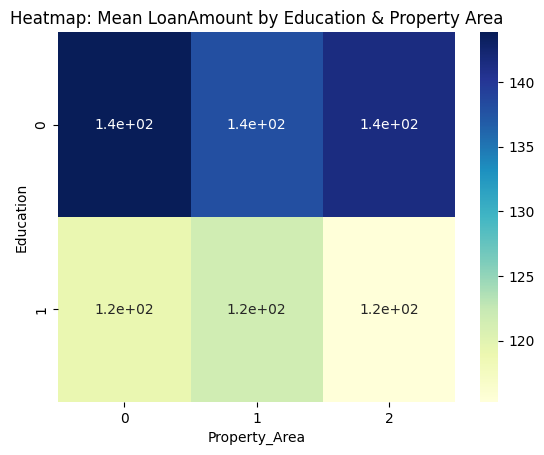

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load and Clean Data
df = pd.read_csv('loan_sanction_test.csv')

# Fill missing values properly for mode and median
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode().iloc[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Convert 'Dependents' from '3+' to 3 and then to int if exists
if 'Dependents' in df.columns:
    df['Dependents'] = df['Dependents'].replace('3+', 3)
    df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce').astype(int)

# Encode categorical columns except Loan_ID
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' and col != 'Loan_ID':
        df[col] = le.fit_transform(df[col])

# Define region coloring mapping
region_col = 'Property_Area'
region_names = {i: name for i, name in enumerate(df[region_col].unique())}
region_palette = sns.color_palette('Set2', len(region_names))

# Prepare features for PCA and MDS (drop Loan_ID)
X = df.drop(['Loan_ID'], axis=1)
y_region = df[region_col]

# PCA - visualize variation colored by region
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_region, palette=region_palette)
plt.title('PCA: Variation across features, colored by region')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Region', labels=[region_names[i] for i in range(len(region_names))])
plt.show()

# MDS - visualize similarity colored by region
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1], hue=y_region, palette=region_palette)
plt.title('MDS: Similarity by Region (multivariate)')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.legend(title='Region', labels=[region_names[i] for i in range(len(region_names))])
plt.show()

# Line graph - mean LoanAmount by region and education
line_df = df.groupby([region_col, 'Education'])['LoanAmount'].mean().unstack()
line_df.plot(kind='line', marker='o', figsize=(8, 5))
plt.title('Mean Loan Amount by Region and Education')
plt.ylabel('Mean Loan Amount')
plt.xlabel('Region')
plt.show()

# Stacked line graph - cumulative LoanAmount by region and education
line_cumsum = line_df.cumsum(axis=1)
line_cumsum.plot(kind='line', marker='o', stacked=True, figsize=(8, 5))
plt.title('Cumulative Loan Amount by Region and Education (Stacked Line)')
plt.ylabel('Cumulative Loan Amount')
plt.xlabel('Region')
plt.show()

# Grouped bar chart - count by region and education
grouped_bar = df.groupby([region_col, 'Education']).size().unstack()
grouped_bar.plot(kind='bar', figsize=(8, 5))
plt.title('Count by Region and Education')
plt.ylabel('Count')
plt.xlabel('Region')
plt.show()

# Stacked bar chart - counts by region and education (stacked)
grouped_bar.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Stacked Count by Region and Education')
plt.ylabel('Count')
plt.xlabel('Region')
plt.show()

# Additional seaborn EDA - pairplot on continuous features colored by Education
cont_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
df[region_col] = df[region_col].astype('category')
sns.pairplot(df, vars=cont_features, hue='Education', diag_kind='kde')
plt.suptitle('Pairplot of Incomes and LoanAmount by Education', y=1.02)
plt.show()

# Faceted scatterplot by Education and Married, colored by region
g = sns.FacetGrid(df, row='Education', col='Married', hue=region_col, margin_titles=True)
g.map_dataframe(sns.scatterplot, x='ApplicantIncome', y='LoanAmount', alpha=0.7)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('ApplicantIncome vs LoanAmount - Faceted by Education & Married, Colored by Region')
plt.show()

# Plotly Parallel Categories Plot for categorical flows colored by LoanAmount
fig = px.parallel_categories(df,
                             dimensions=['Education', 'Property_Area', 'Married', 'Self_Employed'],
                             color='LoanAmount',
                             color_continuous_scale=px.colors.sequential.Inferno)
fig.update_layout(title='Parallel Categories: Loan Features & LoanAmount')
fig.show()

# Plotly Interactive 3D Scatter on three continuous + two categorical features
fig = px.scatter_3d(df,
                    x='ApplicantIncome', y='LoanAmount', z='CoapplicantIncome',
                    color='Property_Area', symbol='Education',
                    title='3D Scatter: Income, Loan, Coapplicant by Area/Education')
fig.show()

# Heatmap of mean LoanAmount by Education and Property_Area
pivot = pd.pivot_table(df, values='LoanAmount', index='Education', columns='Property_Area', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Heatmap: Mean LoanAmount by Education & Property Area')
plt.show()

Here are the inferences for each graph generated by the code:

**PCA: Variation across features, colored by region**
This scatter plot shows the data points projected onto the first two principal components (PC1 and PC2). The points are colored according to the 'Property_Area' (Region). The plot helps visualize the main sources of variation in the dataset and how the different regions are distributed in this reduced dimensionality space. Clusters or separations based on color would indicate that 'Property_Area' is a significant factor in the overall data variation.

**MDS: Similarity by Region (multivariate)**
This scatter plot uses Multi-dimensional Scaling (MDS) to visualize the similarity between data points in a 2D space, again colored by 'Property_Area'. Points that are closer together in the MDS plot are more similar in their original high-dimensional feature space. This plot helps understand if data points from the same region tend to be more similar to each other compared to points from different regions.

**Mean Loan Amount by Region and Education**
This line graph shows the average 'LoanAmount' for each combination of 'Property_Area' (Region) and 'Education'. Each line represents an education level (Graduate or Not Graduate), and the points on the line represent the mean loan amount for each region. This plot allows for comparison of average loan amounts across different regions and education levels, highlighting any potential trends or differences.

**Cumulative Loan Amount by Region and Education (Stacked Line)**
This stacked line graph shows the cumulative mean 'LoanAmount' by region and education. This visualization is less common for this type of data and might be misleading. It shows how the cumulative sum of mean loan amounts changes across regions for each education level.

**Count by Region and Education**
This grouped bar chart shows the number of individuals for each combination of 'Property_Area' (Region) and 'Education'. The bars are grouped by region, with different colored bars representing the education levels within each region. This plot helps to understand the distribution of individuals across regions and education levels in the dataset.

**Stacked Count by Region and Education**
This stacked bar chart shows the total number of individuals for each region, with the bars segmented by education level. This plot provides a clear view of the proportion of each education level within each region and the total count of individuals per region.

**Pairplot of Incomes and LoanAmount by Education**
This pairplot shows scatter plots for all pairs of the continuous features ('ApplicantIncome', 'CoapplicantIncome', and 'LoanAmount'), along with kernel density estimates (KDE) on the diagonal. The points and KDEs are colored by 'Education'. This plot helps to visualize the relationships between these continuous variables and how these relationships differ between graduate and non-graduate individuals.

**ApplicantIncome vs LoanAmount - Faceted by Education & Married, Colored by Region**
This faceted scatter plot shows the relationship between 'ApplicantIncome' and 'LoanAmount', with the plots separated (faceted) by 'Education' and 'Married' status. The points within each facet are colored by 'Property_Area' (Region). This allows for a detailed examination of how the relationship between income and loan amount varies based on education, marital status, and property area.

**Parallel Categories: Loan Features & LoanAmount**
This interactive Plotly parallel categories plot visualizes the flow of data through categorical features ('Education', 'Property_Area', 'Married', 'Self_Employed'). The lines are colored by 'LoanAmount'. This plot is useful for understanding the distribution of loan amounts across different combinations of categorical features and identifying potential patterns or common paths.

**3D Scatter: Income, Loan, Coapplicant by Area/Education**
This interactive Plotly 3D scatter plot visualizes the relationship between three continuous features ('ApplicantIncome', 'LoanAmount', and 'CoapplicantIncome') in a 3D space. The points are colored by 'Property_Area' and symbolized by 'Education'. This plot allows for exploration of the multivariate relationships between these variables and how they are influenced by property area and education.

**Heatmap: Mean LoanAmount by Education & Property Area**
This heatmap shows the average 'LoanAmount' for each combination of 'Education' and 'Property_Area'. The color intensity represents the mean loan amount, and the values are annotated on the heatmap. This plot provides a clear and concise summary of how the mean loan amount varies across education levels and property areas, making it easy to identify which combinations have higher or lower average loan amounts.

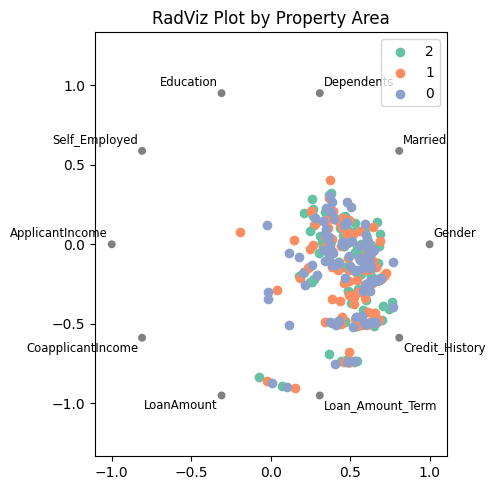

In [ ]:
from pandas.plotting import parallel_coordinates, radviz
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# RadViz Plot
plt.figure(figsize=(5, 5)) # Increased figure size
# Convert seaborn palette to matplotlib colormap
cmap = cm.colors.ListedColormap(region_palette)
# Use a standard subplot instead of polar projection
ax = plt.subplot(111)
radviz(df.drop('Loan_ID', axis=1), 'Property_Area', colormap=cmap, ax=ax)
plt.title('RadViz Plot by Property Area')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Plotly Parallel Coordinates Plot
fig = px.parallel_coordinates(df.drop('Loan_ID', axis=1),
                              color='Property_Area',
                              color_continuous_scale=px.colors.sequential.Inferno)
fig.update_layout(title='Parallel Coordinates Plot by Property Area (Plotly)')
fig.show()

In [ ]:
import plotly.express as px

# Plotly RadViz Plot (Plotly does not have a direct equivalent of RadViz, but parallel coordinates is similar)
# Re-using parallel coordinates as it provides a similar interactive multivariate view
fig = px.parallel_coordinates(df.drop('Loan_ID', axis=1),
                              color='Property_Area',
                              color_continuous_scale=px.colors.sequential.Inferno)
fig.update_layout(title='Multivariate Visualization (similar to RadViz) by Property Area (Plotly)')
fig.show()

ValueError: Cannot set Axes adjustable to 'datalim' for Axes which override 'get_data_ratio'

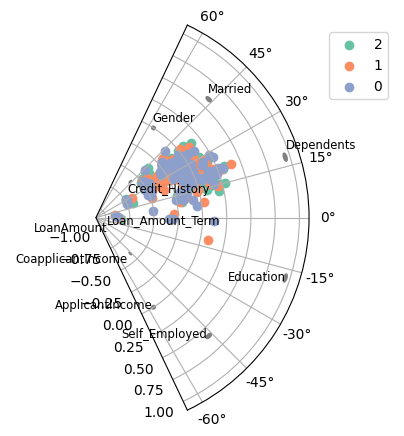

In [ ]:
from pandas.plotting import radviz
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# RadViz Plot with circular grid
plt.figure(figsize=(5, 5)) # Increased figure size
# Convert seaborn palette to matplotlib colormap
cmap = cm.colors.ListedColormap(region_palette)
ax = plt.subplot(111, projection='polar') # Use polar projection for circular grid
radviz(df.drop('Loan_ID', axis=1), 'Property_Area', colormap=cmap, ax=ax)
plt.title('RadViz Plot by Property Area with Circular Grid')
plt.tight_layout()
plt.show()